In [1]:
!pip install rake-nltk

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=ba1879477a3acfbfa5bf532ee66363387a2f9889cea095ef99134a5eab0cbbfc
  Stored in directory: /root/.cache/pip/wheels/ef/92/fc/271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk


In [3]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 7.9MB/s 
     |████████████████████████████████| 552kB 46.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=f98750bd9cb522ccd7dc6528fdc3bcdeca28774dd42eb6828bcf9bc798e5d4ed
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=b5544607d8b1a67ac30e365196153cf7d394fdf473e8c57e1b5affec79070ea1
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.cluster import DBSCAN
from nltk.corpus import stopwords
from spacy.matcher import Matcher 
from collections import  Counter
import matplotlib.pyplot as plt
from spacy.tokens import Span 
import tensorflow_hub as hub
from rake_nltk import Rake
import tensorflow as tf
import pyLDAvis.gensim
from tqdm import tqdm
import seaborn as sns
import networkx as nx
import pandas as pd
import numpy as np
import pyLDAvis
import gensim
import spacy
import os
import gc

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [6]:
from google.colab import drive
#drive.mount('/content/drive')

In [7]:
 #import data
df = pd.read_csv('/content/drive/My Drive/edited_topics_set2.csv')
# shape
print('No. of rows and columns :', df.shape)
# show first few rows
df.head()

No. of rows and columns : (2155, 7)


,Unnamed: 0,Unnamed: 0.1,_id,topic,content,processed_content,processed_topic
0,0,0,5f04e496ef217aae6a201f71,"[""National""]","[""The West Bengal government on Tuesday decide...",west bengal govern tuesday decid impos complet...,nation
1,1,1,5f04e498ef217aae6a201f72,"[""Business""]","[""The government is weighing the pros and cons...",govern weigh pros con halt import includ china...,busi
2,2,2,5f04e49aef217aae6a201f73,"[""National""]","[""The Central Board of Secondary Education (CB...",central board secondari educ cbse slash syllab...,nation
3,3,3,5f04e49def217aae6a201f74,"[""International""]","[""The World Health Organization on Tuesday ack...",world health organ tuesday acknowledg emerg ev...,intern
4,4,4,5f04e49fef217aae6a201f75,"[""International""]","[""President Donald Trump on Tuesday formally s...",presid donald trump tuesday formal start withd...,intern


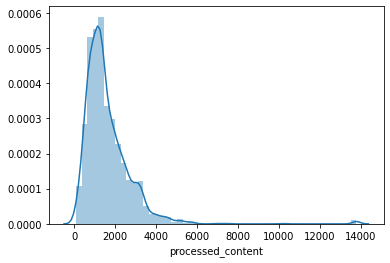

In [8]:
#Distribution of title length
headline_length=df['processed_content'].str.len()
sns.distplot(headline_length)
plt.show()

In [ ]:
# #Distribution of abstract length
# headline_length=all_sources['abstract'].str.len()
# plt.hist(headline_length)
# plt.show()

In [ ]:
# stop=set(stopwords.words('english'))

# def build_list(df,col="processed_content"):
#     corpus=[]
#     lem=WordNetLemmatizer()
#     stop=set(stopwords.words('english'))
#     new= df[col].dropna().str.split()
#     new=new.values.tolist()
#     corpus=[lem.lemmatize(word.lower()) for i in new for word in i if(word) not in stop]
    
#     return corpus

In [10]:
# #Which are most common words in title?
# plt.figure(figsize=(9,7))
# sns.barplot(x=y,y=x)

In [ ]:
#Which are the most common words in abstracts ?


In [ ]:
#Which are the most common bi-grams in title?
top_n_bigrams=get_top_ngram(all_sources['processed_content'].dropna(),2)[:10]
x,y=map(list,zip(top_n_bigrams))
plt.figure(figsize=(9,7))
sns.barplot(x=y,y=x)

In [ ]:
#Which are the most common tri-grams in title?
top_tri_grams=get_top_ngram(all_sources['title'].dropna(),n=3)
x,y=map(list,zip(*top_tri_grams))
plt.figure(figsize=(9,7))
sns.barplot(x=y,y=x)

In [ ]:
# topic modelling

lda_model.show_topics()

In [ ]:
# viualise the topic models


#Method 1: Using Universal sentence Encoder

In [ ]:
#Find Similar Papers

#Done using Universal Sentence encoder and consine similarity.
def prepare_similarity(vectors):
    similarity=cosine_similarity(vectors)
    return similarity

def get_top_similar(sentence, sentence_list, similarity_matrix, topN):
    # find the index of sentence in list
    index = sentence_list.index(sentence)
    # get the corresponding row in similarity matrix
    similarity_row = np.array(similarity_matrix[index, :])
    # get the indices of top similar
    indices = similarity_row.argsort()[-topN:][::-1]
    return [(i,sentence_list[i]) for i in indices]
module_url = "../input/universalsentenceencoderlarge4" 
# Import the Universal Sentence Encoder's TF Hub module
embed = hub.load(module_url)
titles=all_sources['title'].fillna("Unknown")
embed_vectors=embed(titles[:100].values)['outputs'].numpy()
sentence_list=titles.values.tolist()
sentence=titles.iloc[5]
print("Find similar research papers for :")
print(sentence)

similarity_matrix=prepare_similarity(embed_vectors)
similar=get_top_similar(sentence,sentence_list,similarity_matrix,6)

In [ ]:
for sentence in similar:
    print(sentence)
    print("\n")

#Method 2 : Cluster articles using DBSCAN

In [13]:

nlp=spacy.load('en_core_web_sm')
sent_vecs={}
docs=[]

for i in tqdm(df['processed_content'].fillna('unknown')[:1000]):
    doc=nlp((i)) 
    docs.append(doc)
    sent_vecs.update({i :doc.vector})

100%|██████████| 1000/1000 [01:42<00:00,  9.80it/s]


In [14]:
sentences=list(sent_vecs.keys())
vectors=list(sent_vecs.values())
x=np.array(vectors)
dbscan=DBSCAN(eps=0.08, min_samples=2,metric='cosine' ).fit(x)
df_cluster=pd.DataFrame({'sentences':sentences,'label':dbscan.labels_})
df_cluster.label.unique()

array([ 0, -1])

In [17]:
#Some example clusters :
df_cluster[(df_cluster['label']==0)].shape

(859, 2)

In [18]:
df_cluster[(df_cluster['label']==-1)].shape

(1, 2)

Mining related articles

First append articles from all the sources

Choose a subtask from above task

Find related articles

Form a list of abstrat from these articles

Then do keyword extraction to get important keyowords from these research papers.

In [22]:
# path="../input/cord-19-eda-parse-json-and-generate-clean-csv/"
# clean_comm=pd.read_csv(path+"clean_comm_use.csv",nrows=5000)
# clean_comm['source']='clean_comm'
# #clean_pmc=pd.read_csv(path+"clean_pmc.csv")
# #clean_pmc['source']='clean_pmc'
# biox = pd.read_csv(path+"biorxiv_clean.csv")
# biox['source']='biorx'

all_articles= pd.read_csv('/content/drive/My Drive/edited_all_news_set2.csv')
all_articles = all_articles.processed_content
# del biox,clean_comm
# gc.collect()

In [23]:
all_articles.shape

(3092,)

In [19]:
#Define the tasks
tasks=["What is known about transmission, incubation, and environmental stability",
      "What do we know about COVID-19 risk factors",
      "What do we know about virus genetics, origin, and evolution",
      "What do we know about vaccines and therapeutics",
      "What do we know about non-pharmaceutical interventions",
      "What do we know about diagnostics and surveillance",
      "What has been published about ethical and social science considerations",
      "Role of the environment in transmission",
      "Range of incubation periods for the disease in humans",
      "Prevalence of asymptomatic shedding and transmission",
      "Seasonality of transmission",
      "Persistence of virus on surfaces of different materials (e,g., copper, stainless steel, plastic)",
      "Susceptibility of populations",
      "Public health mitigation measures that could be effective for control",
      "Transmission dynamics of the virus",
      "Evidence that livestock could be infected",
      "Socioeconomic and behavioral risk factors for this spill-over",
      "Sustainable risk reduction strategies",
      "Resources to support skilled nursing facilities and long term care facilities",
      "Mobilization of surge medical staff to address shortages in overw"]

In [20]:
task_df=pd.DataFrame({'title':tasks,'source':'task'})
task_df.head()

,title,source
0,"What is known about transmission, incubation, ...",task
1,What do we know about COVID-19 risk factors,task
2,"What do we know about virus genetics, origin, ...",task
3,What do we know about vaccines and therapeutics,task
4,What do we know about non-pharmaceutical inter...,task


In [24]:
all_articles=pd.concat([all_articles,task_df])
all_articles.fillna("Unknown",inplace=True)

In [26]:
# #Find related research papers using USE method.
# sentence_list=all_articles.title.values.tolist()
# embed_vectors=embed(sentence_list)['outputs'].numpy()
# similarity_matrix=prepare_similarity(embed_vectors)
# sentence= "Role of the environment in transmission"

# similar=get_top_similar(sentence,sentence_list,similarity_matrix,10)
# for sent in similar:
#     print(sent[1])

In [ ]:
#Clean and store abstracts from related articles.
ind,title=list(map(list,zip(*similar)))
titles=[]
texts=[]
for i in ind:
    titles.append(all_articles.iloc[i]['title'])
    texts.append(all_articles.iloc[i]['abstract'])

In [ ]:
texts = 

In [27]:
import re
def clean(txt):
    txt=re.sub(r'\n','',txt)
    txt=re.sub(r'\([^()]*\)','',txt)
    txt=re.sub(r'https?:\S+\sdoi','',txt)
    return txt
texts=list(map(clean,texts))
text_list=' '.join(texts)
#text_list=word_tokenize(text_list)

NameError: ignored

Keyword Extraction

In [ ]:
#Method 1:Rake
# Reka
import RAKE
import operator

# Reka setup with stopword directory
stop_dir = "../input/stopwordsforrake/SmartStoplist.txt"
rake_object = RAKE.Rake(stop_dir)

# Sample text to test RAKE


# Extract keywords
keywords = rake_object.run(text_list)
words,score=list(map(list,zip(*keywords)))
for word in (words[:10]):
    print(word)

In [ ]:

Method 2: PytextRank
nlp = spacy.load("en_core_web_sm")

logging.basicConfig(stream=sys.stdout, level=logging.DEBUG)
logger = logging.getLogger("PyTR")

# add PyTextRank into the spaCy pipeline

tr = pytextrank.TextRank(logger=None)
nlp.add_pipe(tr.PipelineComponent, name="textrank", last=True)

# parse the document

doc = nlp(text_list)

print("pipeline", nlp.pipe_names)
print("elapsed time: {} ms".format(tr.elapsed_time))


# examine the top-ranked phrases in the document

In [ ]:
for phrase in doc._.phrases[:10]:
    print("{}".format(phrase.text))
    #print(phrase.chunks)

In [ ]:
#Knowledge Graph
#Next,we will try and draw a knowledge graph from the related papers we found.
import spacy
nlp=spacy.load('en_core_web_sm')

In [ ]:
#Question : What is the Role of the environment in transmission?

In [ ]:
#We will prepare a dataframe that contains,subject,relation and object from these abstracts to plot the knowledge graph.
def prepare_df(text_list):
    doc=nlp(text_list)
    df=pd.DataFrame()
    for sent in list(doc.sents):
        sub,obj = get_entities(str(sent))
        relation= get_relation(str(sent))

        if ((len(relation)>2) & (len(sub)>2) &(len(obj)>2)):
            df=df.append({'subject':sub,'relation':relation,'object':obj},ignore_index=True)

    return df
df = prepare_df(text_list[24:])
df.head()

In [ ]:
def draw_kg(pairs,c1='red',c2='blue',c3='orange'):
    k_graph = nx.from_pandas_edgelist(pairs, 'subject', 'object',
            create_using=nx.MultiDiGraph())
  
    node_deg = nx.degree(k_graph)
    layout = nx.spring_layout(k_graph, k=0.15, iterations=20)
    plt.figure(num=None, figsize=(50, 40), dpi=80)
    nx.draw_networkx(
        k_graph,
        node_size=[int(deg[1]) * 500 for deg in node_deg],
        arrowsize=20,
        linewidths=1.5,
        pos=layout,
        edge_color=c1,
        edgecolors=c2,
        node_color=c3,
        )
    labels = dict(zip(list(zip(pairs.subject, pairs.object)),
                  pairs['relation'].tolist()))
    nx.draw_networkx_edge_labels(k_graph, pos=layout, edge_labels=labels,
                                 font_color='red')
    plt.axis('off')
    plt.show()
draw_kg(df)

In [ ]:
#What is known about transmission, incubation, and environmental stability? 
#Get similar articles.
sentence= "What is known about transmission, incubation, and environmental stability"
similar=get_top_similar(sentence,sentence_list,similarity_matrix,15)

In [ ]:
#Prepare the abstract and title
ind,title=list(map(list,zip(*similar)))
titles=[]
texts=[]
for i in ind:
    titles.append(all_articles.iloc[i]['title'])
    texts.append(all_articles.iloc[i]['abstract'])
texts=list(map(clean,texts))
text_list=' '.join(texts)

In [ ]:
#Find the subject,object and relations and plot the KG.
df = prepare_df(text_list)
draw_kg(df)

In [ ]:
#What do we know about COVID-19 risk factors?
df = prepare_df(text_list)
draw_kg(df,c1='blue',c2='pink',c3='green')

In [ ]:
#What do we know about vaccines and therapeutic?
sentence= "What do we know about vaccines and therapeutics"

similar=get_top_similar(sentence,sentence_list,similarity_matrix,15)

ind,title=list(map(list,zip(*similar)))
titles=[]
texts=[]
for i in ind:
    titles.append(all_articles.iloc[i]['title'])
    texts.append(all_articles.iloc[i]['abstract'])
    
texts=list(map(clean,texts))
text_list=' '.join(texts)
df = prepare_df(text_list)
draw_kg(df,c1='blue',c2='pink',c3='green')


In [ ]:
#What is the Role of the environment in transmission
df = prepare_df(text_list)
draw_kg(df,c1='blue',c2='pink',c3='green')

In [ ]:
#What do we know about non-pharmaceutical interventions?

df = prepare_df(text_list)
draw_kg(df,c1='blue',c2='pink',c3='green')

In [ ]:
#What has been published about ethical and social science considerations?
df = prepare_df(text_list)
draw_kg(df,c1='blue',c2='pink',c3='green')

In [ ]:
#What is known about Role of the environment in transmission?

sentence="Role of the environment in transmission"
similar=get_top_similar(sentence,sentence_list,similarity_matrix,15)

ind,title=list(map(list,zip(*similar)))
titles=[]
texts=[]
for i in ind:
    titles.append(all_articles.iloc[i]['title'])
    texts.append(all_articles.iloc[i]['abstract'])
    
texts=list(map(clean,texts))
text_list=' '.join(texts)
df = prepare_df(text_list)
draw_kg(df,c1='blue',c2='pink',c3='green')

In [ ]:
sentence="Seasonality of transmission"
similar=get_top_similar(sentence,sentence_list,similarity_matrix,15)

ind,title=list(map(list,zip(*similar)))
titles=[]
texts=[]
for i in ind:
    titles.append(all_articles.iloc[i]['title'])
    texts.append(all_articles.iloc[i]['abstract'])
    
texts=list(map(clean,texts))
text_list=' '.join(texts)
df = prepare_df(text_list)
draw_kg(df,c1='blue',c2='pink',c3='green')

In [ ]:
sentence="Prevalence of asymptomatic shedding and transmission"
similar=get_top_similar(sentence,sentence_list,similarity_matrix,15)

ind,title=list(map(list,zip(*similar)))
titles=[]
texts=[]
for i in ind:
    titles.append(all_articles.iloc[i]['title'])
    texts.append(all_articles.iloc[i]['abstract'])
    
texts=list(map(clean,texts))
text_list=' '.join(texts)
df = prepare_df(text_list)
draw_kg(df,c1='blue',c2='pink',c3='green')

In [ ]:
sentence="Public health mitigation measures that could be effective for control"
similar=get_top_similar(sentence,sentence_list,similarity_matrix,15)

ind,title=list(map(list,zip(*similar)))
titles=[]
texts=[]
for i in ind:
    titles.append(all_articles.iloc[i]['title'])
    texts.append(all_articles.iloc[i]['abstract'])
    
texts=list(map(clean,texts))
text_list=' '.join(texts)

df = prepare_df(text_list)
draw_kg(df,c1='blue',c2='pink',c3='green')